In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import copy

In [337]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [338]:
def load_dataset():
    data = load_breast_cancer()
    df = pd.DataFrame(data['data'])
    df.columns = data['feature_names']
    df['cat 1'] = (df['mean radius'] + df['mean texture'] < df['worst radius'] / 0.5).astype('int')
    df['cat 2'] = (df['mean compactness'] * df['mean concavity'] < df['mean smoothness'] / 10).astype('int')
    df['cat 3'] = (df['mean symmetry'] / df['mean smoothness'] < df['worst symmetry'] * 7).astype('int')

    return copy.deepcopy(df)

In [339]:
df = load_dataset()
                       
missing = 0.3
i_range, j_range = df.shape

for i in range(i_range):
    for j in range(j_range):
        if np.random.rand() < missing:
            df.iloc[i, j] = np.nan

In [340]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,17.99,10.38,NaN,1001.0,NaN,NaN,NaN,0.14710,0.2419,0.07871,...,2019.0,NaN,NaN,0.7119,0.2654,NaN,0.11890,1.0,NaN,1.0
1,20.57,17.77,132.90,1326.0,0.08474,NaN,NaN,0.07017,NaN,0.05667,...,1956.0,0.12380,NaN,0.2416,NaN,NaN,0.08902,NaN,1.0,0.0
2,19.69,21.25,NaN,1203.0,NaN,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.0,NaN,0.42450,0.4504,NaN,0.3613,0.08758,NaN,NaN,1.0
3,11.42,20.38,77.58,386.1,0.14250,NaN,NaN,0.10520,NaN,NaN,...,567.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0
4,20.29,14.34,135.10,NaN,0.10030,0.13280,0.19800,NaN,NaN,0.05883,...,NaN,NaN,0.20500,0.4000,0.1625,0.2364,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,NaN,1479.0,0.11100,NaN,NaN,0.13890,0.1726,NaN,...,2027.0,0.14100,NaN,0.4107,NaN,0.2060,0.07115,1.0,0.0,0.0
565,NaN,28.25,131.20,NaN,0.09780,NaN,NaN,0.09791,NaN,0.05533,...,NaN,0.11660,0.19220,NaN,0.1628,0.2572,0.06637,0.0,0.0,1.0
566,16.60,NaN,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,1124.0,NaN,NaN,0.3403,0.1418,0.2218,0.07820,NaN,NaN,NaN
567,NaN,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,NaN,...,1821.0,NaN,0.86810,NaN,NaN,0.4087,0.12400,1.0,0.0,1.0


In [341]:
df_stage = df.copy()

df_min = df_stage.min()
df_max = df_stage.max()

dfn = (df_stage - df_min) / (df_max - df_min)
# Inverse
# dfn = dfn * (df_max - df_min) + df_min

In [342]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor

model = RandomForestRegressor()

In [343]:
i_range, j_range = df.shape

In [350]:
dfi = dfn.copy()

inter_indexes = []
for j in range(j_range):
    inter_indexes.append(dfi.iloc[:, j].isna())

for iteration in tqdm.trange(5):
    
    scores = []
    for target_index in range(j_range):
        explan_index = list(range(j_range))
        explan_index.remove(target_index)
        y = dfi.iloc[:, target_index].copy()

        X = dfi.iloc[:, explan_index].copy()
        X.fillna(X.mean(), inplace=True)

        y_train = y[~inter_indexes[target_index]]
        X_train = X[~inter_indexes[target_index]]
        X_inter = X[inter_indexes[target_index]]
        y_inter = model.fit(X_train, y_train).predict(X_inter)
        y[y.isna()] = y_inter
        scores.append(model.score(X_train, y_train))
        dfi.iloc[:, target_index] = y

    print(np.mean(scores))

 20%|████████████████▊                                                                   | 1/5 [00:11<00:44, 11.23s/it]

0.9672587889640019


 40%|█████████████████████████████████▌                                                  | 2/5 [00:22<00:33, 11.29s/it]

0.9732328947586492


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:33<00:22, 11.32s/it]

0.9733697574954068


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:45<00:11, 11.34s/it]

0.974285898158297


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.33s/it]

0.9732024227307959


In [351]:
dfi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,0.521037,0.000000,0.506157,0.364042,0.516373,0.417140,0.563194,0.731113,0.686364,0.635775,...,0.450698,0.507324,0.395792,0.568610,0.912027,0.511224,0.418215,1.00,0.02,1.00
1,0.643144,0.255709,0.615783,0.502017,0.289880,0.189686,0.168369,0.348757,0.333985,0.143591,...,0.435214,0.347553,0.209271,0.192971,0.553625,0.252937,0.222011,1.00,1.00,0.00
2,0.601496,0.376125,0.599827,0.449798,0.458562,0.431017,0.462946,0.635686,0.509596,0.217731,...,0.374508,0.495688,0.385375,0.359744,0.698351,0.486576,0.212555,1.00,0.00,1.00
3,0.210090,0.346021,0.233501,0.102993,0.811321,0.345333,0.311629,0.522863,0.505798,0.447680,...,0.094008,0.657056,0.276345,0.256730,0.504471,0.484488,0.286518,0.00,0.00,1.00
4,0.629893,0.137024,0.630986,0.501792,0.430351,0.347893,0.464353,0.580373,0.369626,0.191827,...,0.341445,0.378439,0.172415,0.319489,0.558419,0.189831,0.135344,0.99,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.415571,0.801382,0.566971,0.526948,0.374572,0.510957,0.690358,0.336364,0.237338,...,0.452664,0.461137,0.284469,0.328035,0.679804,0.117605,0.104669,1.00,0.00,0.00
565,0.610053,0.618339,0.604036,0.461091,0.407782,0.290163,0.319260,0.486630,0.316323,0.113667,...,0.367900,0.300007,0.159997,0.240716,0.559450,0.239249,0.073281,0.00,0.00,1.00
566,0.455251,0.526332,0.445788,0.303375,0.288165,0.254340,0.216956,0.263519,0.267677,0.139348,...,0.230731,0.320137,0.233023,0.271805,0.487285,0.155144,0.150962,0.27,0.37,0.25
567,0.654726,0.655709,0.665538,0.476120,0.588336,0.790197,0.824109,0.755467,0.675253,0.518778,...,0.402035,0.696051,0.815758,0.608832,0.874485,0.599192,0.451704,1.00,0.00,1.00


In [352]:
df_full = load_dataset()
df_full_n = (df_full - df_min) / (df_max - df_min)
mape = np.abs(dfi - df_full_n).to_numpy().flatten().mean()

print(f"MAPE:\t{round(mape * 100, 3)}%")

df_result = dfi * (df_max - df_min) + df_min
mae = np.abs(df_result - df_full).to_numpy().flatten().mean()

print(f"MAE:\t{round(mae, 3)}")

MAPE:	1.542%
MAE:	0.701


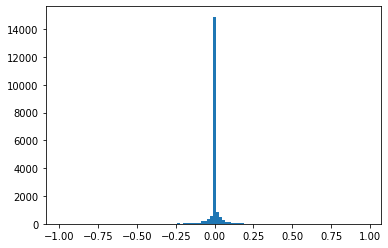

In [353]:
plt.hist((dfi - df_full_n).to_numpy().flatten(), bins=100)
plt.show()

In [359]:
RandomForestRegressor.__bases__

(sklearn.ensemble._forest.ForestRegressor,)